## 1. Carga de librerías y datos

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de estilo visual
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8, 5) 

# Cargar el dataset
df = pd.read_csv('AI_Impact_on_Jobs_2030.csv')

print(f"Dimensiones del dataset: {df.shape}")
display(df.head())

Dimensiones del dataset: (3000, 18)


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


## 2. Preprocesamiento de datos

Para que la regresión lineal funcione correctamente, es importante que los datos estén correctamente preprocesados. En este caso, convertiremos las variables de texto como Educacion_Level y Risk_Category a variables numéricas.

In [20]:
# 1. Convertir 'Education_Level' a numérico (Ordinal) para que el modelo lo entienda
education_map = {"High School": 1, "Bachelor's": 2, "Master's": 3, "PhD": 4}
df['Education_Score'] = df['Education_Level'].map(education_map)

# 2. Convertir 'Risk_Category' a numérico
risk_map = {"Low": 1, "Medium": 2, "High": 3}
df['Risk_Score'] = df['Risk_Category'].map(risk_map)

# 3. CREACIÓN DE LA VARIABLE OBJETIVO
np.random.seed(42)

df['Salario_Proyectado_2030'] = (
    df['Average_Salary'] +                # Salario base
    (df['Years_Experience'] * 1200) +            # $1,200 por cada año de experiencia
    (df['Education_Score'] * 5000) +             # $5,000 por cada nivel educativo
    (df['Tech_Growth_Factor'] * 3000) -          # Bono por sector tecnológico
    (df['Automation_Probability_2030'] * 15000) + # Penalización por riesgo de automatización
    np.random.normal(0, 2000, len(df))           # Variabilidad natural (Ruido)
)

print("Variables listas. Ejemplo de Salario Proyectado creado.")

Variables listas. Ejemplo de Salario Proyectado creado.


## 3. Análisis Exploratorio de Datos
Visualizamos cómo las variables se relacionan con nuestro objetivo. Esto justifica por qué usamos regresión lineal.

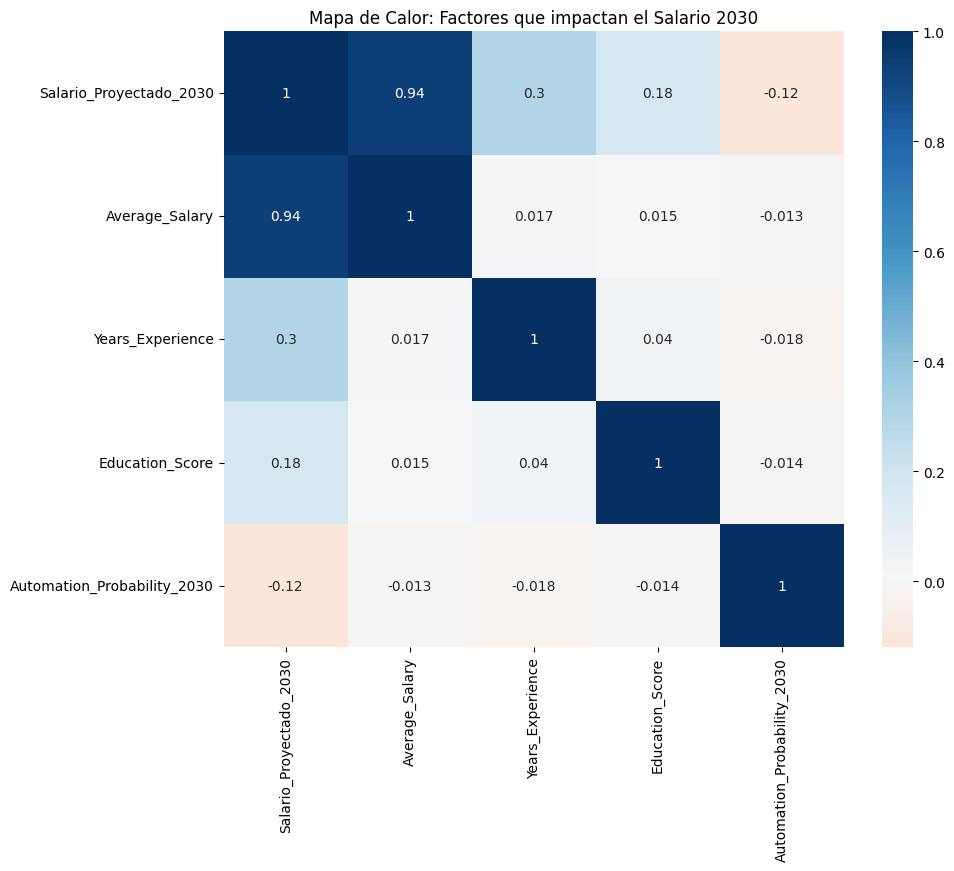

In [21]:
# Seleccionamos las columnas de interés
cols_interes = ['Salario_Proyectado_2030', 'Average_Salary', 'Years_Experience',
                'Education_Score', 'Automation_Probability_2030']

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_interes].corr(), annot=True, cmap='RdBu', center=0)
plt.title('Mapa de Calor: Factores que impactan el Salario 2030')
plt.show()

## 4. División de datos en entrenamiento y prueba

Preparamos los datos para entrenar el modelo.

In [22]:
# Definir X (Variables predictoras) e y (Variable a predecir)
features = ['Average_Salary', 'Years_Experience', 'Education_Score',
            'Tech_Growth_Factor', 'Automation_Probability_2030']

X = df[features] # Variables predictoras
y = df['Salario_Proyectado_2030'] # Variable objetivo

# Dividir en set de train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Modelo entrenado.")

Modelo entrenado.


## 5. Evaluación de métricas

Métricas que demuestran el buen rendimiento del modelo

In [23]:
# Predecir con los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- RESULTADOS DEL MODELO ---")
print(f"R² (Calidad del ajuste): {r2:.4f} (Ideal: cercano a 1.0)")
print(f"MAE (Error promedio en $): ${mae:,.2f}")
print(f"RMSE (Desviación estándar del error): ${np.sqrt(mse):,.2f}")

--- RESULTADOS DEL MODELO ---
R² (Calidad del ajuste): 0.9972 (Ideal: cercano a 1.0)
MAE (Error promedio en $): $1,579.66
RMSE (Desviación estándar del error): $1,984.26


--- INSIGHTS VALORABLES ---


,Impacto_en_Salario ($)
Education_Score,5040.800828
Tech_Growth_Factor,2818.276561
Years_Experience,1188.517283
Average_Salary,0.998942
Automation_Probability_2030,-15127.085711


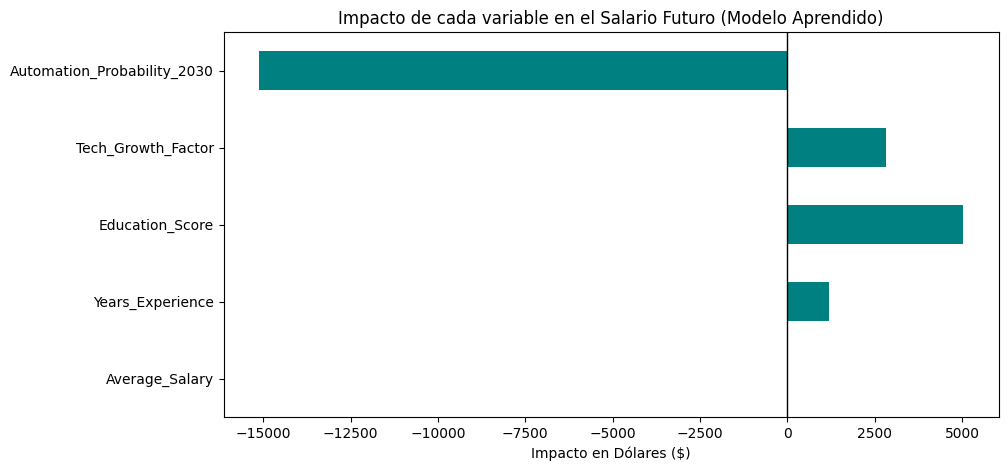

In [24]:
# Crear un DataFrame con los coeficientes
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Impacto_en_Salario ($)'])

print("--- INSIGHTS VALORABLES ---")
display(coeficientes.sort_values(by='Impacto_en_Salario ($)', ascending=False))

# Gráfico de Coeficientes
plt.figure(figsize=(10, 5))
coeficientes['Impacto_en_Salario ($)'].plot(kind='barh', color='teal')
plt.title('Impacto de cada variable en el Salario Futuro (Modelo Aprendido)')
plt.xlabel('Impacto en Dólares ($)')
plt.axvline(x=0, color='black', linewidth=1)
plt.show()

## 6. Visualización de predicción vs realidad.

Esto es clave para entender la tendencia del modelo, y lo más importante, que la regresión funciona.

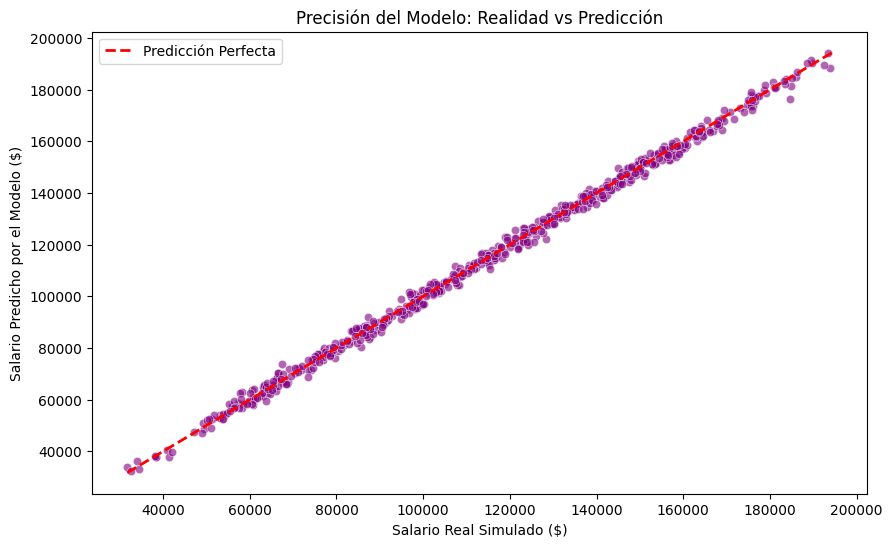

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')

# Línea perfecta ideal
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Predicción Perfecta')

plt.xlabel('Salario Real Simulado ($)')
plt.ylabel('Salario Predicho por el Modelo ($)')
plt.title('Precisión del Modelo: Realidad vs Predicción')
plt.legend()
plt.show()

## 7. Uso de la regresión lineal para predecir el salario proyectado en 2030.



In [32]:
mi_perfil = pd.DataFrame({
    'Average_Salary': [80000],
    'Years_Experience': [10],          # Años de experiencia
    'Education_Score': [3],            # Riesgo de 0.0 a 1.0
    'Tech_Growth_Factor': [1.2],          
    'Automation_Probability_2030': [0.2]
})


# Predicción 
resultado = modelo.predict(mi_perfil)[0]
print(f"💰 Salario Proyectado Anual 2030: ${resultado:,.2f}")

💰 Salario Proyectado Anual 2030: $107,724.78
